Linear Regression

Building a linear regression model to understand the drivers which influence car prices. 

The car_data.csv dataset contains the following data points about car prices:

- 1 Car_Name - the model of the car
- 2 Year - the year of the car
- 3 Selling_Price - the current selling price of the used car
- 4 Present_Price - the price of the same car, but new
- 5 Kms_Driven - how many kms have been driven
- 6 Fuel_Type - diesel or gas
- 7 Seller_Type - sold by a dealer or individual seller
- 8 Transmission - standard or automatic
- 9 Owner - number of owners


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats

In [39]:
car_data = pd.read_csv('car_data.csv', header = 0)

In [40]:
car_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [41]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [42]:

car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [43]:
car_data.isnull()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
296,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False


In [44]:
car_data.isnull().sum().to_frame()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [45]:
car_data.isnull().values.any()

False

In [46]:
car_data.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [47]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [48]:
car_data['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [49]:
car_data.shape

(301, 9)

Question 1: 

As the dataset is fairly clean and organized, no changes were made to the dataset.
Things checked were consistency in formatting, missing values, zeros, negative values,maximum and minimum values.

In [50]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [51]:
car_data.median()

Year              2014.0
Selling_Price        3.6
Present_Price        6.4
Kms_Driven       32000.0
Owner                0.0
dtype: float64

In [52]:
car_data.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


In [53]:

car_data.groupby('Car_Name')['Selling_Price'].mean().sort_values(ascending=False)

Car_Name
land cruiser           35.000000
fortuner               18.685455
innova                 12.777778
creta                  11.800000
elantra                11.600000
                         ...    
Hero Super Splendor     0.200000
Hero Hunk               0.200000
Hero  CBZ Xtreme        0.200000
Bajaj  ct 100           0.180000
Bajaj Discover 125      0.175000
Name: Selling_Price, Length: 98, dtype: float64

In [54]:
car_data.groupby('Car_Name')['Present_Price'].mean().sort_values(ascending = False)

Car_Name
land cruiser          92.600000
fortuner              30.732727
camry                 23.730000
innova                17.846667
corolla altis         17.582500
                        ...    
Activa 4g              0.510000
Honda CB twister       0.510000
Hero Splender Plus     0.480000
Bajaj Discover 100     0.470000
Bajaj  ct 100          0.320000
Name: Present_Price, Length: 98, dtype: float64

In [55]:
car_data.groupby('Car_Name')['Kms_Driven'].mean().sort_values(ascending = False)

Car_Name
Activa 3g             250250.000000
camry                 142000.000000
corolla               135154.000000
800                   127000.000000
Honda Karizma         121500.000000
                          ...      
Suzuki Access 125       1900.000000
Bajaj Avenger 220       1766.666667
UM Renegade Mojave      1400.000000
Activa 4g               1300.000000
Bajaj Dominar 400       1200.000000
Name: Kms_Driven, Length: 98, dtype: float64

In [56]:
car_data.groupby(['Car_Name','Transmission'])['Kms_Driven'].mean().sort_values(ascending = False)

Car_Name            Transmission
Activa 3g           Automatic       250250.000000
camry               Automatic       142000.000000
corolla             Automatic       135154.000000
800                 Manual          127000.000000
Honda Karizma       Manual          121500.000000
                                        ...      
Suzuki Access 125   Automatic         1900.000000
Bajaj Avenger 220   Manual            1766.666667
UM Renegade Mojave  Manual            1400.000000
Activa 4g           Automatic         1300.000000
Bajaj Dominar 400   Manual            1200.000000
Name: Kms_Driven, Length: 111, dtype: float64

In [57]:
car_data.groupby(['Car_Name','Transmission','Fuel_Type'])['Kms_Driven'].mean().sort_values(ascending = False)

Car_Name            Transmission  Fuel_Type
Activa 3g           Automatic     Petrol       250250.000000
camry               Automatic     Petrol       142000.000000
corolla             Automatic     Petrol       135154.000000
800                 Manual        Petrol       127000.000000
Honda Karizma       Manual        Petrol       121500.000000
                                                   ...      
Suzuki Access 125   Automatic     Petrol         1900.000000
Bajaj Avenger 220   Manual        Petrol         1766.666667
UM Renegade Mojave  Manual        Petrol         1400.000000
Activa 4g           Automatic     Petrol         1300.000000
Bajaj Dominar 400   Manual        Petrol         1200.000000
Name: Kms_Driven, Length: 129, dtype: float64

In [58]:
car_data.groupby(['Car_Name','Year','Transmission','Fuel_Type'])['Kms_Driven'].mean().sort_values(ascending = False)

Car_Name           Year  Transmission  Fuel_Type
Activa 3g          2008  Automatic     Petrol       500000.0
Honda Karizma      2010  Manual        Petrol       213000.0
innova             2005  Manual        Diesel       197176.0
camry              2006  Automatic     Petrol       142000.0
corolla            2004  Automatic     Petrol       135154.0
                                                      ...   
Activa 4g          2017  Automatic     Petrol         1300.0
Bajaj Dominar 400  2017  Manual        Petrol         1200.0
Hero Passion Pro   2016  Manual        Petrol         1000.0
Bajaj Avenger 220  2016  Manual        Petrol          500.0
Activa 3g          2016  Automatic     Petrol          500.0
Name: Kms_Driven, Length: 233, dtype: float64

In [59]:
car_data.groupby(['Car_Name','Seller_Type','Transmission','Fuel_Type'])['Kms_Driven'].mean().sort_values(ascending = False)

Car_Name            Seller_Type  Transmission  Fuel_Type
Activa 3g           Individual   Automatic     Petrol       250250.000000
camry               Individual   Automatic     Petrol       142000.000000
corolla             Dealer       Automatic     Petrol       135154.000000
fortuner            Individual   Automatic     Diesel       135000.000000
800                 Individual   Manual        Petrol       127000.000000
                                                                ...      
Suzuki Access 125   Individual   Automatic     Petrol         1900.000000
Bajaj Avenger 220   Individual   Manual        Petrol         1766.666667
UM Renegade Mojave  Individual   Manual        Petrol         1400.000000
Activa 4g           Individual   Automatic     Petrol         1300.000000
Bajaj Dominar 400   Individual   Manual        Petrol         1200.000000
Name: Kms_Driven, Length: 132, dtype: float64

In [60]:
car_data.groupby(['Car_Name','Transmission'])['Selling_Price'].mean().sort_values(ascending = False)

Car_Name             Transmission
land cruiser         Manual          35.000000
fortuner             Automatic       20.737778
innova               Automatic       20.375000
creta                Manual          11.800000
elantra              Manual          11.750000
                                       ...    
Hero Super Splendor  Manual           0.200000
Hero Hunk            Manual           0.200000
Hero  CBZ Xtreme     Manual           0.200000
Bajaj  ct 100        Manual           0.180000
Bajaj Discover 125   Manual           0.175000
Name: Selling_Price, Length: 111, dtype: float64

In [61]:
car_data.groupby(['Car_Name','Transmission','Fuel_Type'])['Selling_Price'].mean().sort_values(ascending = False)

Car_Name             Transmission  Fuel_Type
land cruiser         Manual        Diesel       35.000000
fortuner             Automatic     Diesel       20.737778
innova               Automatic     Diesel       20.583333
                                   Petrol       19.750000
creta                Manual        Diesel       12.075000
                                                  ...    
Hero Hunk            Manual        Petrol        0.200000
Hero  CBZ Xtreme     Manual        Petrol        0.200000
Hero Super Splendor  Manual        Petrol        0.200000
Bajaj  ct 100        Manual        Petrol        0.180000
Bajaj Discover 125   Manual        Petrol        0.175000
Name: Selling_Price, Length: 129, dtype: float64

In [62]:
car_data.groupby(['Car_Name','Seller_Type','Transmission','Fuel_Type'])['Selling_Price'].mean().sort_values(ascending = False)

Car_Name             Seller_Type  Transmission  Fuel_Type
land cruiser         Dealer       Manual        Diesel       35.000000
fortuner             Dealer       Automatic     Diesel       21.330000
innova               Dealer       Automatic     Diesel       20.583333
                                                Petrol       19.750000
fortuner             Individual   Automatic     Diesel       16.000000
                                                               ...    
Hero Super Splendor  Individual   Manual        Petrol        0.200000
Hero Hunk            Individual   Manual        Petrol        0.200000
Hero  CBZ Xtreme     Individual   Manual        Petrol        0.200000
Bajaj  ct 100        Individual   Manual        Petrol        0.180000
Bajaj Discover 125   Individual   Manual        Petrol        0.175000
Name: Selling_Price, Length: 132, dtype: float64

In [63]:
car_data.groupby(['Car_Name','Seller_Type','Transmission','Fuel_Type'])['Selling_Price'].max().sort_values(ascending = False)

Car_Name             Seller_Type  Transmission  Fuel_Type
land cruiser         Dealer       Manual        Diesel       35.00
fortuner             Dealer       Automatic     Diesel       33.00
innova               Dealer       Automatic     Diesel       23.00
                                                Petrol       19.75
corolla altis        Dealer       Manual        Petrol       17.00
                                                             ...  
Hero  Ignitor Disc   Individual   Manual        Petrol        0.20
Bajaj Discover 125   Individual   Manual        Petrol        0.20
Hero Hunk            Individual   Manual        Petrol        0.20
Hero Super Splendor  Individual   Manual        Petrol        0.20
Bajaj  ct 100        Individual   Manual        Petrol        0.18
Name: Selling_Price, Length: 132, dtype: float64

In [64]:
car_data.groupby(['Car_Name','Seller_Type','Transmission','Fuel_Type'])['Kms_Driven'].max().sort_values(ascending = False)

Car_Name            Seller_Type  Transmission  Fuel_Type
Activa 3g           Individual   Automatic     Petrol       500000
Honda Karizma       Individual   Manual        Petrol       213000
innova              Dealer       Manual        Diesel       197176
camry               Individual   Automatic     Petrol       142000
corolla             Dealer       Automatic     Petrol       135154
                                                             ...  
vitara brezza       Dealer       Manual        Diesel         2071
Suzuki Access 125   Individual   Automatic     Petrol         1900
UM Renegade Mojave  Individual   Manual        Petrol         1400
Activa 4g           Individual   Automatic     Petrol         1300
Bajaj Dominar 400   Individual   Manual        Petrol         1200
Name: Kms_Driven, Length: 132, dtype: int64

In [65]:
car_data.groupby(['Car_Name','Kms_Driven','Selling_Price']).max().sort_values('Kms_Driven', ascending = False)

,,,Year,Present_Price,Fuel_Type,Seller_Type,Transmission,Owner
Car_Name,Kms_Driven,Selling_Price,,,,,,
Activa 3g,500000,0.17,2008,0.52,Petrol,Individual,Automatic,0
Honda Karizma,213000,0.31,2010,1.05,Petrol,Individual,Manual,0
innova,197176,3.49,2005,13.46,Diesel,Dealer,Manual,0
camry,142000,2.50,2006,23.73,Petrol,Individual,Automatic,3
corolla,135154,1.50,2004,12.35,Petrol,Dealer,Automatic,0
...,...,...,...,...,...,...,...,...
Activa 4g,1300,0.40,2017,0.51,Petrol,Individual,Automatic,0
Bajaj Dominar 400,1200,1.45,2017,1.60,Petrol,Individual,Manual,0
Hero Passion Pro,1000,0.45,2016,0.55,Petrol,Individual,Manual,0


In [66]:
car_data.groupby('Car_Name').max().sort_values('Selling_Price',ascending=False)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Car_Name,,,,,,,,
land cruiser,2010,35.00,92.60,78000,Diesel,Dealer,Manual,0
fortuner,2017,33.00,36.23,135000,Diesel,Individual,Manual,0
innova,2017,23.00,25.39,197176,Petrol,Individual,Manual,0
corolla altis,2017,17.00,22.83,89000,Petrol,Dealer,Manual,0
creta,2016,12.90,13.60,68000,Petrol,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
Hero Ignitor Disc,2013,0.20,0.65,24000,Petrol,Individual,Manual,1
Bajaj Discover 125,2012,0.20,0.57,35000,Petrol,Individual,Manual,1
Hero Hunk,2007,0.20,0.75,49000,Petrol,Individual,Manual,1


In [67]:
car_data.groupby('Car_Name').min().sort_values('Selling_Price',ascending=True)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Car_Name,,,,,,,,
Bajaj Pulsar 150,2006,0.10,0.74,5000,Petrol,Individual,Manual,0
Honda CB Shine,2007,0.12,0.58,30000,Petrol,Individual,Manual,0
Bajaj Discover 125,2011,0.15,0.57,25000,Petrol,Individual,Manual,1
Honda CB twister,2010,0.16,0.51,32000,Petrol,Individual,Manual,0
Activa 3g,2008,0.17,0.52,500,Petrol,Individual,Automatic,0
...,...,...,...,...,...,...,...,...
vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
fortuner,2010,9.25,20.45,6000,Diesel,Dealer,Automatic,0
creta,2015,11.25,13.60,22671,Diesel,Dealer,Manual,0


In [68]:
car_data.groupby('Car_Name').max().sort_values('Kms_Driven',ascending=False)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Car_Name,,,,,,,,
Activa 3g,2016,0.45,0.54,500000,Petrol,Individual,Automatic,0
Honda Karizma,2011,0.35,1.05,213000,Petrol,Individual,Manual,0
innova,2017,23.00,25.39,197176,Petrol,Individual,Manual,0
camry,2006,2.50,23.73,142000,Petrol,Individual,Automatic,3
corolla,2004,1.50,12.35,135154,Petrol,Dealer,Automatic,0
...,...,...,...,...,...,...,...,...
vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
Suzuki Access 125,2008,0.25,0.58,1900,Petrol,Individual,Automatic,0
UM Renegade Mojave,2017,1.70,1.82,1400,Petrol,Individual,Manual,0


In [69]:
car_data.groupby('Car_Name').max().sort_values('Present_Price',ascending=False)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Car_Name,,,,,,,,
land cruiser,2010,35.00,92.60,78000,Diesel,Dealer,Manual,0
fortuner,2017,33.00,36.23,135000,Diesel,Individual,Manual,0
innova,2017,23.00,25.39,197176,Petrol,Individual,Manual,0
camry,2006,2.50,23.73,142000,Petrol,Individual,Automatic,3
corolla altis,2017,17.00,22.83,89000,Petrol,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
Honda CB twister,2013,0.25,0.51,33000,Petrol,Individual,Manual,0
Honda Activa 4G,2017,0.48,0.51,4300,Petrol,Individual,Automatic,0
Hero Splender Plus,2016,0.30,0.48,50000,Petrol,Individual,Manual,0


In [70]:
car_data.groupby('Car_Name').min().sort_values('Present_Price',ascending=False)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Car_Name,,,,,,,,
land cruiser,2010,35.00,92.60,78000,Diesel,Dealer,Manual,0
camry,2006,2.50,23.73,142000,Petrol,Individual,Automatic,3
fortuner,2010,9.25,20.45,6000,Diesel,Dealer,Automatic,0
elantra,2015,11.45,14.79,12900,Diesel,Dealer,Automatic,0
creta,2015,11.25,13.60,22671,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
Honda CB twister,2010,0.16,0.51,32000,Petrol,Individual,Manual,0
Honda Activa 4G,2017,0.45,0.51,4000,Petrol,Individual,Automatic,0
Hero Splender Plus,2016,0.30,0.48,50000,Petrol,Individual,Manual,0


In [71]:
car_data.groupby(['Car_Name','Selling_Price','Kms_Driven','Fuel_Type','Seller_Type']).aggregate(['count','min','max','mean'])

Year        \
                                                             count   min   
Car_Name      Selling_Price Kms_Driven Fuel_Type Seller_Type               
800           0.35          127000     Petrol    Individual      1  2003   
Activa 3g     0.17          500000     Petrol    Individual      1  2008   
              0.45          500        Petrol    Individual      1  2016   
Activa 4g     0.40          1300       Petrol    Individual      1  2017   
Bajaj  ct 100 0.18          35000      Petrol    Individual      1  2015   
...                                                            ...   ...   
wagon r       2.90          56879      Petrol    Dealer          1  2013   
              3.25          35500      CNG       Dealer          1  2015   
xcent         4.40          34000      Petrol    Dealer          1  2014   
              4.75          35866      Petrol    Dealer          1  2015   
              5.75          12479      Petrol    Dealer          1  2017   

                                                                            \
                                                               max    mean   
Car_Name      Selling_Price Kms_Driven Fuel_Type Seller_Type                 
800           0.35          127000     Petrol    Individual   2003  2003.0   
Activa 3g     0.17          500000     Petrol    Individual   2008  2008.0   
              0.45          500        Petrol    Individual   2016  2016.0   
Activa 4g     0.40          1300       Petrol    Individual   2017  2017.0   
Bajaj  ct 100 0.18          35000      Petrol    Individual   2015  2015.0   
...                                                            ...     ...   
wagon r       2.90          56879      Petrol    Dealer       2013  2013.0   
              3.25          35500      CNG       Dealer       2015  2015.0   
xcent         4.40          34000      Petrol    Dealer       2014  2014.0   
              4.75          35866      Petrol    Dealer       2015  2015.0   
              5.75          12479      Petrol    Dealer       2017  2017.0   

                                                             Present_Price  \
                                                                     count   
Car_Name      Selling_Price Kms_Driven Fuel_Type Seller_Type                 
800           0.35          127000     Petrol    Individual              1   
Activa 3g     0.17          500000     Petrol    Individual              1   
              0.45          500        Petrol    Individual              1   
Activa 4g     0.40          1300       Petrol    Individual              1   
Bajaj  ct 100 0.18          35000      Petrol    Individual              1   
...                                                                    ...   
wagon r       2.90          56879      Petrol    Dealer                  1   
              3.25          35500      CNG       Dealer                  1   
xcent         4.40          34000      Petrol    Dealer                  1   
              4.75          35866      Petrol    Dealer                  1   
              5.75          12479      Petrol    Dealer                  1   

                                                                          \
                                                               min   max   
Car_Name      Selling_Price Kms_Driven Fuel_Type Seller_Type               
800           0.35          127000     Petrol    Individual   2.28  2.28   
Activa 3g     0.17          500000     Petrol    Individual   0.52  0.52   
              0.45          500        Petrol    Individual   0.54  0.54   
Activa 4g     0.40          1300       Petrol    Individual   0.51  0.51   
Bajaj  ct 100 0.18          35000      Petrol    Individual   0.32  0.32   
...                                                            ...   ...   
wagon r       2.90          56879      Petrol    Dealer       4.41  4.41   
              3.25          35500      CNG       De

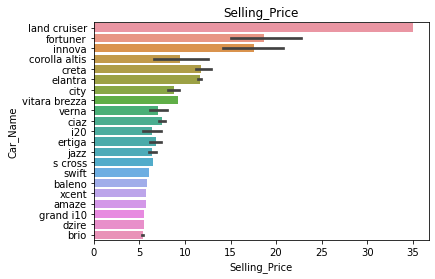

In [72]:
ax = sns.barplot(x="Selling_Price", y="Car_Name", data=car_data.sort_values('Selling_Price',ascending=False)[:98])
_ = ax.set(xlabel='Selling_Price', ylabel='Car_Name',title = "Selling_Price")

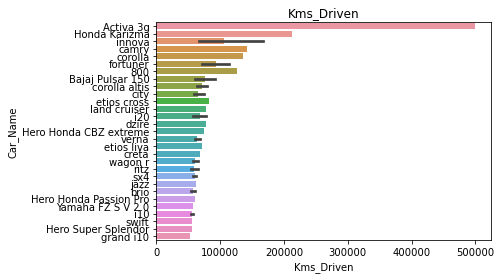

In [73]:
ax = sns.barplot(x="Kms_Driven", y="Car_Name", data=car_data.sort_values('Kms_Driven',ascending=False)[:60])
_ = ax.set(xlabel='Kms_Driven', ylabel='Car_Name',title = "Kms_Driven")

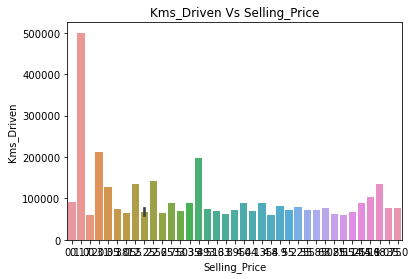

In [106]:
ax = sns.barplot(x="Selling_Price", y="Kms_Driven", data=car_data.sort_values('Kms_Driven',ascending=False)[:40])
_ = ax.set(xlabel='Selling_Price', ylabel='Kms_Driven',title = "Kms_Driven Vs Selling_Price")

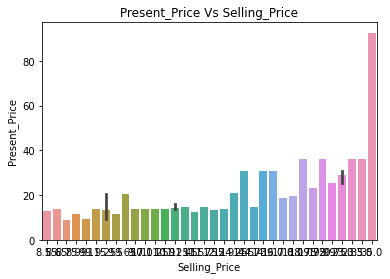

In [107]:
ax = sns.barplot(x="Selling_Price", y="Present_Price", data=car_data.sort_values('Selling_Price',ascending=False)[:40])
_ = ax.set(xlabel='Selling_Price', ylabel='Present_Price',title = "Present_Price Vs Selling_Price")

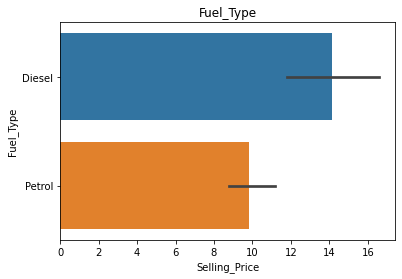

In [77]:
ax = sns.barplot(x="Selling_Price", y="Fuel_Type", data=car_data.sort_values('Selling_Price',ascending=False)[:60])
_ = ax.set(xlabel='Selling_Price', ylabel='Fuel_Type',title = "Fuel_Type")

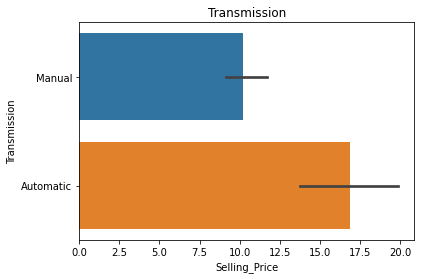

In [78]:
ax = sns.barplot(x="Selling_Price", y="Transmission", data=car_data.sort_values('Selling_Price',ascending=False)[:60])
_ = ax.set(xlabel='Selling_Price', ylabel='Transmission',title = "Transmission")

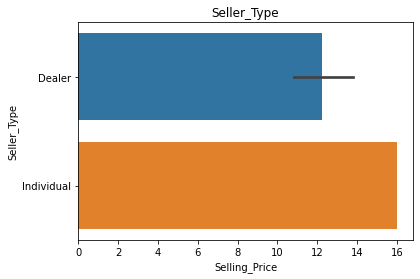

In [80]:
ax = sns.barplot(x="Selling_Price", y="Seller_Type", data=car_data.sort_values('Selling_Price',ascending=False)[:60])
_ = ax.set(xlabel='Selling_Price', ylabel='Seller_Type',title = "Seller_Type")

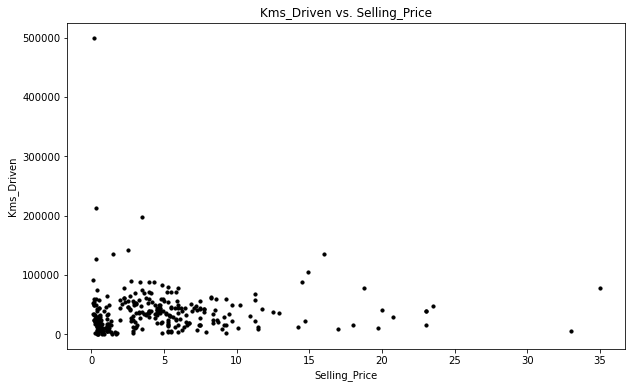

In [81]:
fig = plt.figure(figsize=(10,6))
scatter = plt.scatter(car_data['Selling_Price'],car_data['Kms_Driven'],s=10,c='black') 
plt.title('Kms_Driven vs. Selling_Price')
plt.xlabel("Selling_Price")
plt.ylabel("Kms_Driven")
plt.show()


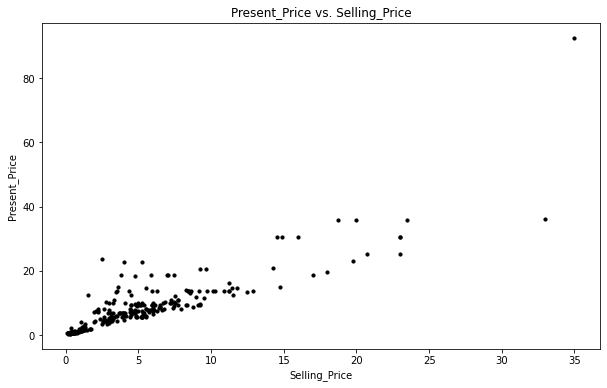

In [82]:
fig = plt.figure(figsize=(10,6))
scatter = plt.scatter(car_data['Selling_Price'],car_data['Present_Price'],s=10,c='black') 
plt.title('Present_Price vs. Selling_Price')
plt.xlabel("Selling_Price")
plt.ylabel("Present_Price")
plt.show()


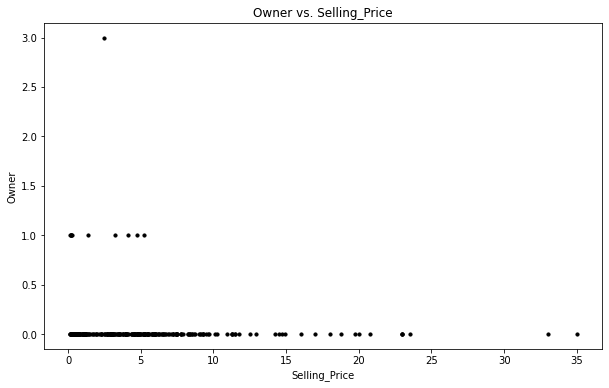

In [111]:
fig = plt.figure(figsize=(10,6))
scatter = plt.scatter(car_data['Selling_Price'],car_data['Owner'],s=10,c='black') 
plt.title('Owner vs. Selling_Price')
plt.xlabel("Selling_Price")
plt.ylabel("Owner")
plt.show()


Upon conducting exploratory analysis, The variables looked at were: selling price, kms driven, fuel_types, transmission,seller type, present price and owner.  

Fuel type,Tranmission and seller type are some variables examined via bar chart. 
Based on the bar chart it seems diesel if preferred over petrol.
Based on the bar chart it seems automatic cars are more expensive than manual cars. 
As for the seller type, it seems more car bought privately rather than car delearship. 


Scatter plot for Kms_driven vs Selling_price, does not show any rise of selling_price as kms go up. The only conculsion that can be drawn from the plot is that most of the cars purchased are in the range of (0-100,000)km. Generally people like to purchase second hand car in that km range. 
Whereas scatter plot of Present_price vs Selling_price shows that the higher priced cars has a higher resale price. So one can assume that price of used car does get's effected by the present price of a new car. 
Lastly number of owner were looked at, mostly car sold were owned by a single owners only. Also used car sells for less if there are 2 or more owners. 


Hypothesis is that selling price of used car gets effected by present price, ownership, transmission and fuel type. It was surprising that kms_driven did not have an effect on the selling price of the care. 
The above hypothesis will be run on a linear regression model in the next step. 

 Regression

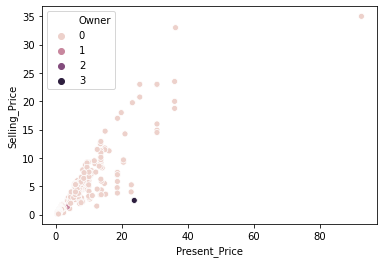

In [83]:
sns.scatterplot(x=car_data['Present_Price'], y=car_data['Selling_Price'], hue=car_data['Owner'])

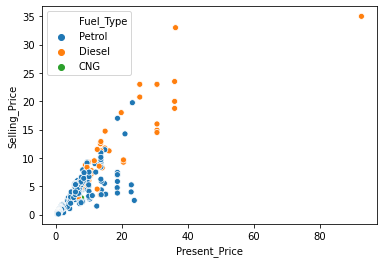

In [84]:
sns.scatterplot(x=car_data['Present_Price'], y=car_data['Selling_Price'], hue=car_data['Fuel_Type'])

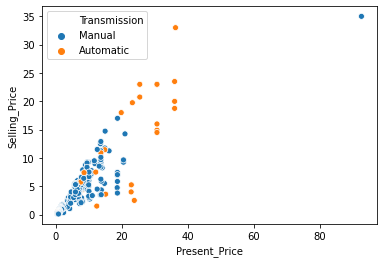

In [85]:
sns.scatterplot(x=car_data['Present_Price'], y=car_data['Selling_Price'], hue=car_data['Transmission'])

In [86]:
results=ols("Selling_Price ~ Seller_Type + Present_Price + Kms_Driven ",data=car_data).fit()

In [87]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     421.1
Date:                Tue, 15 Dec 2020   Prob (F-statistic):          1.29e-106
Time:                        17:23:36   Log-Likelihood:                -666.33
No. Observations:                 301   AIC:                             1341.
Df Residuals:                     297   BIC:                             1355.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

Kms_Driven is not a good variable as it brings about multicollinerity in the results. Also kms_driven does not effect the selling price of the care. Therefore kms_driven was not included in the analysis.

In [88]:
results1=ols("Selling_Price ~ Seller_Type + Present_Price + Transmission ",data=car_data).fit()

In [89]:
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     379.5
Date:                Tue, 15 Dec 2020   Prob (F-statistic):          2.98e-101
Time:                        17:23:54   Log-Likelihood:                -678.86
No. Observations:                 301   AIC:                             1366.
Df Residuals:                     297   BIC:                             1381.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

R-squared value is 0.793. R-Squared value will be between 0 and 1. R-squared is explaining the output in our case.In this case all three variables are good variables for the analysis. We are also looking at the p-value  as well, wich has to be  p-value <0.05. In this model, p-value < 0.05, hence it is statistically significant predictor of the model.  Also the probabilty(F-statistic) is low in this case.

In [90]:
#Dummy Variables
Fuel_dummies = pd.get_dummies(car_data['Fuel_Type'])

In [91]:
Fuel_dummies

,CNG,Diesel,Petrol
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,0,1,0
...,...,...,...
296,0,1,0
297,0,0,1
298,0,0,1
299,0,1,0


In [92]:
car_data=pd.concat([car_data,Fuel_dummies],axis=1)

In [93]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,CNG,Diesel,Petrol
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,0,0,1
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,0,1,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,0,0,1
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,0,0,1
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,0,1,0


In [95]:
results3 = ols('Selling_Price ~ Present_Price + Seller_Type + C(Petrol) + C(Diesel)',data=car_data).fit()

In [96]:
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     307.6
Date:                Tue, 15 Dec 2020   Prob (F-statistic):          4.48e-104
Time:                        17:25:13   Log-Likelihood:                -669.13
No. Observations:                 301   AIC:                             1348.
Df Residuals:                     296   BIC:                             1367.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

R-squared value is 0.806. R-Squared value will be between 0 and 1. R-squared is explaining the output in our case. We are also looking at the p-value of, p-value<0.05. In this case of addition of fuel type as the variable, it gives p-value > 0.05 for both petrol and diesel, therefore it is not statistically significant predictor of the model, even though regression value has imporved by 0.01.  Also the probabilty(F-statistic) is low in this case as well.

In [97]:
Owner_dummies = pd.get_dummies(car_data['Owner'])

In [98]:
Owner_dummies.rename(columns={0:'Zero',1:'One',3:'Two'}, inplace=True)

In [99]:
Owner_dummies

,Zero,One,Two
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
296,1,0,0
297,1,0,0
298,1,0,0
299,1,0,0


In [100]:
car_data=pd.concat([car_data,Owner_dummies],axis=1)

In [101]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,CNG,Diesel,Petrol,Zero,One,Two
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,0,0,1,1,0,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,0,1,0,1,0,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,0,0,1,1,0,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,0,0,1,1,0,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,0,1,0,1,0,0


In [102]:
results4 = ols('Selling_Price ~ Present_Price + Seller_Type + C(Zero) + C(One)',data=car_data).fit()

In [103]:
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     290.6
Date:                Tue, 15 Dec 2020   Prob (F-statistic):          3.67e-101
Time:                        17:26:35   Log-Likelihood:                -675.96
No. Observations:                 301   AIC:                             1362.
Df Residuals:                     296   BIC:                             1380.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

R-squared value is 0.797. R-Squared value will be between 0 and 1. R-squared is explaining the output in our case. We are also looking at the p-value of, p-value<0.05. If p-value is less than 0.05, that means owner is a statistically significant predictor of the model. Probability(F-statistic) value is also very small, indicating the overall effectiveness of the model.

In summary all the varibles such as present price, kms driven, fuel type seller type, transmission and number of owners was looked at for regression modelling. Intially it was thought that kms_driven and fuel_type would be a factors, but upon exploratory analysis and  regression modelling it did not seem to be a effecting the selling price of the used car. Factors effecting selling price  are present_price, seller_type, transmission and number of owners.

The way i would have changed my approach. 
I would have liked to have categorized by different car and year of make, to see which car has higher selling price based on year of make. Also does year of make effect the selling price of the car overall. 